<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CNN-from-Scratch:-No-Data-Augmentation" data-toc-modified-id="CNN-from-Scratch:-No-Data-Augmentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CNN from Scratch: No Data Augmentation</a></span></li><li><span><a href="#Feature-extraction:-Transfer-learning" data-toc-modified-id="Feature-extraction:-Transfer-learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature extraction: Transfer learning</a></span></li></ul></div>

# CNN from Scratch: No Data Augmentation

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
from keras import backend as K
import keras

In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/Users/fatimaloumaini/Documents/PassionProject copy/Train'
validation_data_dir = '/Users/fatimaloumaini/Documents/PassionProject copy/Validation'
test_data_dir = '/Users/fatimaloumaini/Documents/PassionProject copy/Test'
nb_train_samples = 770
nb_validation_samples = 90
nb_test_samples = 90
epochs = 10
batch_size = 5
dropout_rate = .25

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(dropout_rate))


model.add(Conv2D(32, (3, 3), padding='same', ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(dropout_rate))


model.add(keras.layers.BatchNormalization())
model.add(Dropout(dropout_rate))

model.add(Conv2D(32, (3, 3), padding='same', ))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(keras.layers.BatchNormalization())

model.add(keras.layers.GlobalAveragePooling2D())
# model.add(Dense(64))
# model.add(Activation('relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(10)) # TODO: make units equal to num of classes 
model.add(Activation('softmax')) # TODO: make act 'softmax' 

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)    

In [3]:
# model.compile(loss='binary_crossentropy', # TODO: make loss categorical_crossentropy for one-hot encoded y labels (or sparse_categorical_crossentropy for label indexes) 
#               optimizer='rmsprop',
#               metrics=['accuracy'])


model.compile(loss='categorical_crossentropy', # TODO: make loss categorical_crossentropy for one-hot encoded y labels (or sparse_categorical_crossentropy for label indexes) 
              optimizer='adam',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator( rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #rescale=1. / 255,
      fill_mode='nearest')
     
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
#test_datagen = ImageDataGenerator(rescale=1. / 255)
validate_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator( rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validate_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')


history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
    )

model.save('curlyhair_deep.h5')

Found 577 images belonging to 10 classes.
Found 71 images belonging to 10 classes.
Found 71 images belonging to 10 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
115/115 [==============================] - 20s 174ms/step - loss: 2.2844 - acc: 0.1600 - val_loss: 2.2576 - val_acc: 0.1429
Epoch 2/10
115/115 [==============================] - 17s 147ms/step - loss: 2.2661 - acc: 0.1600 - val_loss: 2.2491 - val_acc: 0.1364
Epoch 3/10
115/115 [==============================] - 17s 152ms/step - loss: 2.1975 - acc: 0.1913 - val_loss: 2.6250 - val_acc: 0.2273
Epoch 4/10
115/115 [==============================] - 17s 151ms/step - loss: 2.2053 - acc: 0.1896 - val_loss: 2.4731 - val_acc: 0.2121
Epoch 5/10
115/115 [==============================] - 17s 148ms/step - loss: 2.1675 - acc: 0.2017 - val_loss: 2.2059 - val_acc: 0.1970
Epoch 6/10
115/115 [==============================] - 17s 146ms/step - loss: 2.1821 - acc: 0.1913 - val_loss: 2.3796 - val_acc: 0.2121
Epoch 7/10
115/115

In [4]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

# Feature extraction: Transfer learning


In [3]:
from keras.applications import imagenet_utils, mobilenet
mobilenet_model = mobilenet.MobileNet(weights='imagenet',include_top=False, alpha =1,input_shape=(150, 150, 3), pooling='avg' )
for layer in mobilenet_model.layers:
    layer.trainable = False   
    


Instructions for updating:
Colocations handled automatically by placer.


/anaconda3/envs/metis/lib/python3.7/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [4]:
#mobilenet_model.summary()

In [5]:
from keras import backend as K


In [14]:
from keras import models
from keras import layers
from keras.layers import Input, Dense
img_width, img_height = 150, 150

train_data_dir = '/Users/fatimaloumaini/Documents/PassionProject copy/Train'
validation_data_dir = '/Users/fatimaloumaini/Documents/PassionProject copy/Validation'
test_data_dir = '/Users/fatimaloumaini/Documents/PassionProject copy/Test'
nb_train_samples = 770
nb_validation_samples = 90
nb_test_samples = 90
epochs = 100
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
cnn = models.Sequential()
cnn.add(mobilenet_model)
# model.add(layers.Flatten())
cnn.add(keras.layers.BatchNormalization())
cnn.add(Dropout(0.5))
# For classification
cnn.add(layers.Dense(1, activation='linear'))

cnn.add(keras.layers.Lambda(lambda x: K.sigmoid(x)*8 ))



# x = mobilenet_model.output
# x = Flatten()(x) # flatten from convolution tensor output 
# x= Dropout(0.1) (x)
# classification_output = Dense(10, activation='softmax')(x) # should match # of classes predicted
# transfer= model(inputs=mobilenet_model.input, outputs=classification_output)
# regression_output = Dense(1, activation='linear')(classification_output) 

# # this is the model we will train
# transfer= model(inputs=mobilenet_model.input, outputs=[classification_output,regression_output])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
# from keras import models
# from keras import layers
# from keras.layers import Input, Dense
# img_width, img_height = 150, 150

# train_data_dir = '/Users/fatimaloumaini/Documents/PassionProject/Train'
# validation_data_dir = '/Users/fatimaloumaini/Documents/PassionProject/Validation'
# test_data_dir = '/Users/fatimaloumaini/Documents/PassionProject/Test'
# nb_train_samples = 822
# nb_validation_samples = 101
# nb_test_samples = 103
# epochs = 100
# batch_size = 32

# if K.image_data_format() == 'channels_first':
#     input_shape = (3, img_width, img_height)
# else:
#     input_shape = (img_width, img_height, 3)
    
# cnn = models.Sequential()
# cnn.add(mobilenet_model)
# # model.add(layers.Flatten())
# cnn.add(keras.layers.BatchNormalization())
# cnn.add(Dropout(0.5))
# # For classification
# cnn.add(layers.Dense(9, activation='softmax'))



In [16]:

mobilenet_model.trainable = False



In [17]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 1024)              3228864   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 3,233,985
Trainable params: 3,073
Non-trainable params: 3,230,912
_________________________________________________________________


In [ ]:
import keras

In [103]:
cnn.compile(optimizer=keras.optimizers.nadam(lr=0.002),
                  loss=['mse'],
                  metrics=['accuracy','mae'])

# def top_3_acc(y_true, y_pred):
#     return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)

# cnn.compile(optimizer=keras.optimizers.nadam(lr=0.002),
#                   loss='mse',
#                   metrics=['accuracy','mae'])



# this is the augmentation configuration we will use for training
train_datagen_ = ImageDataGenerator( 
    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
     shear_range=0.2,
      zoom_range=0.3,
      rescale=1./255,
      horizontal_flip=True
    #fill_mode='nearest'
      )
      

test_datagen_= ImageDataGenerator(rescale=1./255)
real_classes = ['2a', '2b', '2c', '3a', '3b', '3c', '4a', '4b', '4c']
    
train_generator_ = train_datagen_.flow_from_directory(
    train_data_dir,
    classes=real_classes,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='sparse')

validation_generator_ = test_datagen_.flow_from_directory(
    validation_data_dir,
    classes=real_classes,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='sparse')


filepath = 'weights.{epoch:02d}-{val_loss:.2f}.hdf5'
transfer_learning = cnn.fit_generator(
    train_generator_,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator_,
    validation_steps=nb_validation_samples // batch_size,
    verbose = 1,
    callbacks=[
        keras.callbacks.ReduceLROnPlateau(patience=2, verbose=1),
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, verbose=1),
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_mean_absolute_error', verbose=1, save_best_only=True, mode='min')])

    # ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
    

cnn.save('transfer_learning_regression.h5')

Found 768 images belonging to 9 classes.
Found 90 images belonging to 9 classes.
Epoch 1/100
24/24 [==============================] - 21s 865ms/step - loss: 3.3754 - acc: 0.2669 - mean_absolute_error: 1.4036 - val_loss: 3.6490 - val_acc: 0.2188 - val_mean_absolute_error: 1.4197

Epoch 00001: val_mean_absolute_error improved from inf to 1.41968, saving model to weights.01-3.65.hdf5
Epoch 2/100
24/24 [==============================] - 25s 1s/step - loss: 3.3491 - acc: 0.2409 - mean_absolute_error: 1.4156 - val_loss: 4.3591 - val_acc: 0.1724 - val_mean_absolute_error: 1.6322

Epoch 00002: val_mean_absolute_error did not improve from 1.41968
Epoch 3/100
24/24 [==============================] - 20s 819ms/step - loss: 3.4844 - acc: 0.2370 - mean_absolute_error: 1.4449 - val_loss: 3.4096 - val_acc: 0.2759 - val_mean_absolute_error: 1.4981

Epoch 00003: val_mean_absolute_error did not improve from 1.41968
Epoch 4/100
24/24 [==============================] - 19s 784ms/step - loss: 3.0052 - acc:

In [104]:
# # cnn.compile(optimizer=keras.optimizers.nadam(lr=0.002),
# #                   loss=['mse'],
# #                   metrics=['accuracy','mae'])

# import keras.backend as K

# def mean_pred(y_true, y_pred):
#     return K.mean(y_pred)


# cnn.compile(optimizer=keras.optimizers.nadam(lr=0.002),
#                   loss='mse',
#                   metrics=['accuracy',mean_pred])



# # this is the augmentation configuration we will use for training
# train_datagen_ = ImageDataGenerator( 
#     rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#      shear_range=0.2,
#       zoom_range=0.3,
#       rescale=1./255,
#       horizontal_flip=True
#     #fill_mode='nearest'
#       )
      

# test_datagen_= ImageDataGenerator(rescale=1./255)
# real_classes = ['2a', '2b', '2c', '3a', '3b', '3c', '4a', '4b', '4c']
    
# train_generator_ = train_datagen_.flow_from_directory(
#     train_data_dir,
#     classes=real_classes,
#     target_size=(150, 150),
#     batch_size=batch_size,
#     class_mode='sparse')

# validation_generator_ = test_datagen_.flow_from_directory(
#     validation_data_dir,
#     classes=real_classes,
#     target_size=(150, 150),
#     batch_size=batch_size,
#     class_mode='sparse')


# filepath = 'weights.{epoch:02d}-{val_loss:.2f}.hdf5'
# transfer_learning = cnn.fit_generator(
#     train_generator_,
#     steps_per_epoch=nb_train_samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator_,
#     validation_steps=nb_validation_samples // batch_size,
#     verbose = 1,
#     callbacks=[
#         keras.callbacks.ReduceLROnPlateau(patience=2, verbose=1),
#         keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, verbose=1),
#         keras.callbacks.ModelCheckpoint(filepath, monitor='val_mean_pred', verbose=1, save_best_only=True, mode='min')])

#     # ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
    

# cnn.save('transfer_learning.h5')

In [105]:
train_generator_ = train_datagen_.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='sparse')

Found 768 images belonging to 9 classes.


In [106]:
train_generator_.__next__()[1]

array([8., 5., 7., 7., 7., 1., 4., 7., 3., 4., 5., 6., 3., 4., 6., 3., 5.,
       4., 2., 7., 5., 5., 3., 4., 8., 2., 6., 6., 2., 2., 3., 6.],
      dtype=float32)

In [107]:
real_classes = ['2a', '2b', '2c', '3a', '3b', '3c', '4a', '4b', '4c']

In [108]:
list(train_generator_.class_indices.keys())

['2a', '2b', '2c', '3a', '3b', '3c', '4a', '4b', '4c']

In [109]:
test_data_dir

'/Users/fatimaloumaini/Documents/PassionProject copy/Test'

In [110]:
# Predict on test dataset
test_generator_ = test_datagen_.flow_from_directory(
    test_data_dir,
    classes=real_classes,
    target_size=(150, 150),
    batch_size=32)
    #class_mode='sparse')


Found 90 images belonging to 9 classes.


In [111]:
test_generator_.reset()



In [112]:
x,y = test_generator_.__next__()

print(x.shape)


(32, 150, 150, 3)


In [113]:
import numpy as np

In [114]:
np.ceil(test_generator_.n / test_generator_.batch_size)

3.0

In [115]:
steps = np.ceil(test_generator_.n / test_generator_.batch_size)
steps

3.0

In [116]:
pred=cnn.predict_generator(test_generator_,verbose=2, steps=3)



In [117]:
pred

array([[7.2422786 ],
       [7.796323  ],
       [7.1407347 ],
       [7.146268  ],
       [3.986197  ],
       [2.4277735 ],
       [6.2397127 ],
       [4.637605  ],
       [7.604001  ],
       [0.83598614],
       [4.862296  ],
       [0.74763036],
       [1.7022412 ],
       [5.5861444 ],
       [5.3774233 ],
       [3.2180204 ],
       [3.1619952 ],
       [0.30395293],
       [7.7914867 ],
       [4.3875446 ],
       [4.431928  ],
       [2.9289355 ],
       [2.3684168 ],
       [0.25957727],
       [1.1269181 ],
       [4.309211  ],
       [5.4190283 ],
       [0.3043306 ],
       [0.38528228],
       [1.8141649 ],
       [2.2722278 ],
       [1.4797022 ],
       [0.7371769 ],
       [0.7595506 ],
       [4.437942  ],
       [6.199211  ],
       [2.9435139 ],
       [3.0299025 ],
       [5.138427  ],
       [4.6107025 ],
       [6.2692575 ],
       [3.9600425 ],
       [1.5933256 ],
       [2.6976194 ],
       [5.370982  ],
       [4.867452  ],
       [6.9745646 ],
       [0.454

In [118]:
predicted_class_indices=np.round(pred)

In [120]:
for index1 in range(len(pred)):
    for index2 in range(len(pred[index1])):
        print(index1, pred[index1][index2])

0 7.2422786
1 7.796323
2 7.1407347
3 7.146268
4 3.986197
5 2.4277735
6 6.2397127
7 4.637605
8 7.604001
9 0.83598614
10 4.862296
11 0.74763036
12 1.7022412
13 5.5861444
14 5.3774233
15 3.2180204
16 3.1619952
17 0.30395293
18 7.7914867
19 4.3875446
20 4.431928
21 2.9289355
22 2.3684168
23 0.25957727
24 1.1269181
25 4.309211
26 5.4190283
27 0.3043306
28 0.38528228
29 1.8141649
30 2.2722278
31 1.4797022
32 0.7371769
33 0.7595506
34 4.437942
35 6.199211
36 2.9435139
37 3.0299025
38 5.138427
39 4.6107025
40 6.2692575
41 3.9600425
42 1.5933256
43 2.6976194
44 5.370982
45 4.867452
46 6.9745646
47 0.45484424
48 5.7208147
49 1.9447513
50 6.3055816
51 4.162413
52 7.4606104
53 6.4531994
54 3.1117606
55 7.0187836
56 3.7778895
57 1.8590677
58 1.1165328
59 6.279236
60 5.3774233
61 4.862296
62 3.7778895
63 1.5950131
64 5.370982
65 2.9289355
66 2.3684168
67 5.6159477
68 4.637605
69 0.7595506
70 7.5260496
71 0.83598614
72 1.0458214
73 7.146268
74 0.25957727
75 2.9138622
76 0.38528228
77 1.1269181
78 0.7

In [119]:
for index1 in range(len(predicted_class_indices)):
    for index2 in range(len(predicted_class_indices[index1])):
        print(index1, predicted_class_indices[index1][index2])
   

0 7.0
1 8.0
2 7.0
3 7.0
4 4.0
5 2.0
6 6.0
7 5.0
8 8.0
9 1.0
10 5.0
11 1.0
12 2.0
13 6.0
14 5.0
15 3.0
16 3.0
17 0.0
18 8.0
19 4.0
20 4.0
21 3.0
22 2.0
23 0.0
24 1.0
25 4.0
26 5.0
27 0.0
28 0.0
29 2.0
30 2.0
31 1.0
32 1.0
33 1.0
34 4.0
35 6.0
36 3.0
37 3.0
38 5.0
39 5.0
40 6.0
41 4.0
42 2.0
43 3.0
44 5.0
45 5.0
46 7.0
47 0.0
48 6.0
49 2.0
50 6.0
51 4.0
52 7.0
53 6.0
54 3.0
55 7.0
56 4.0
57 2.0
58 1.0
59 6.0
60 5.0
61 5.0
62 4.0
63 2.0
64 5.0
65 3.0
66 2.0
67 6.0
68 5.0
69 1.0
70 8.0
71 1.0
72 1.0
73 7.0
74 0.0
75 3.0
76 0.0
77 1.0
78 1.0
79 1.0
80 0.0
81 4.0
82 4.0
83 3.0
84 7.0
85 3.0
86 7.0
87 6.0
88 2.0
89 2.0


In [101]:
pred.shape

(90, 1)

In [71]:
test_images,test_labels = next(test_generator_)


In [72]:
test_batches = test_generator_.class_indices
test_batches

{'2a': 0,
 '2b': 1,
 '2c': 2,
 '3a': 3,
 '3b': 4,
 '3c': 5,
 '4a': 6,
 '4b': 7,
 '4c': 8}

In [73]:
#pred


In [74]:
import numpy as np


In [75]:
predicted_class_indices=np.round(pred)



(array([12.,  4., 15.,  6.,  7.,  9., 14., 23.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.], dtype=float32),
 <a list of 8 Patch objects>)

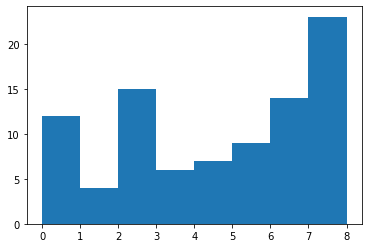

In [76]:
import matplotlib.pyplot as plt
plt.hist(predicted_class_indices, bins=8)



In [77]:
import numpy as np
y_pred = np.rint(pred)


In [78]:
classes = test_generator_.class_indices   
classes

{'2a': 0,
 '2b': 1,
 '2c': 2,
 '3a': 3,
 '3b': 4,
 '3c': 5,
 '4a': 6,
 '4b': 7,
 '4c': 8}

In [81]:
import matplotlib as plt
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/Users/fatimaloumaini/Documents/PassionProject copy/Test/3a/z2.jpg', target_size = (150, 150)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
img_class = cnn.predict_classes(test_image)
img_class

array([[1]], dtype=int32)

In [82]:
pred.T

array([[1.7338908 , 6.765278  , 5.250736  , 5.6292033 , 5.7725677 ,
        2.1657865 , 1.5320477 , 2.2208643 , 0.14749503, 0.23086405,
        6.9618106 , 3.9004397 , 2.4617171 , 5.496406  , 6.6222677 ,
        0.4721315 , 4.4339857 , 0.10271764, 1.795414  , 7.9297895 ,
        2.8784723 , 5.749159  , 7.9131694 , 7.1584363 , 2.4452717 ,
        0.33357573, 0.53404045, 4.907497  , 6.771264  , 0.10758877,
        4.7446156 , 0.32430148, 6.738212  , 0.47117686, 4.1169133 ,
        7.038923  , 3.6971457 , 7.9079084 , 5.751144  , 7.937593  ,
        7.2411175 , 0.13843131, 7.066474  , 1.7517555 , 7.69543   ,
        5.660625  , 5.526524  , 1.9774303 , 7.7303486 , 5.503126  ,
        5.4904795 , 0.6288204 , 6.3469877 , 0.95759153, 1.4010584 ,
        3.440555  , 2.9951732 , 5.7686133 , 3.6971457 , 2.8784723 ,
        2.4452717 , 7.9131694 , 0.4721315 , 5.503126  , 5.660625  ,
        2.6279154 , 6.3469877 , 6.765278  , 1.9774303 , 6.771264  ,
        1.7517555 , 2.4617171 , 4.1169133 , 2.99

In [240]:
y_pred.T

array([[5., 3., 1., 6., 8., 0., 8., 5., 1., 4., 6., 3., 4., 7., 7., 6.,
        1., 1., 4., 4., 5., 2., 4., 8., 8., 1., 1., 2., 3., 1., 8., 2.,
        0., 6., 7., 7., 6., 7., 3., 8., 8., 5., 7., 1., 6., 7., 5., 8.,
        2., 8., 5., 0., 6., 8., 1., 6., 1., 6., 4., 6., 7., 1., 4., 8.,
        0., 3., 8., 6., 8., 2., 8., 8., 0., 1., 3., 3., 5., 1., 8., 1.,
        6., 6., 4., 6., 7., 0., 2., 8., 4., 8.]], dtype=float32)

In [241]:
y_true = test_generator_.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8], dtype=int32)

In [242]:
from sklearn.metrics import confusion_matrix
array_cm= confusion_matrix(y_true, y_pred, labels=range(8))
array_cm



array([[1, 2, 0, 1, 1, 2, 1, 0],
       [0, 2, 0, 1, 3, 0, 2, 2],
       [0, 3, 2, 1, 1, 1, 0, 0],
       [1, 0, 1, 1, 0, 0, 2, 3],
       [0, 1, 1, 0, 0, 2, 1, 2],
       [1, 2, 0, 0, 1, 1, 4, 0],
       [1, 1, 1, 1, 1, 0, 1, 1],
       [1, 3, 0, 2, 0, 1, 0, 0]])

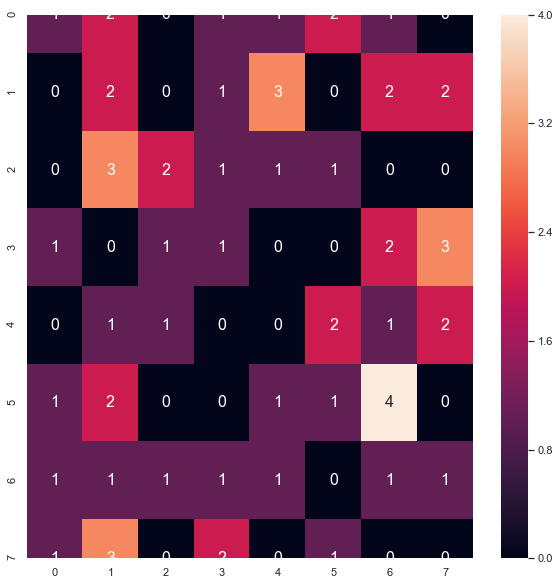

In [243]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
      
df_cm = pd.DataFrame(array_cm, range(8),
                  range(8))
plt.figure(figsize = (10,10))
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

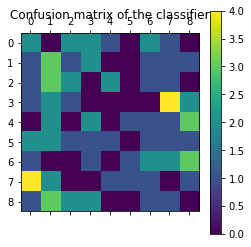

In [83]:


from sklearn.metrics import confusion_matrix
import pylab as pl


cm = confusion_matrix(y_true, y_pred)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [104]:
y_pred.shape

(38,)

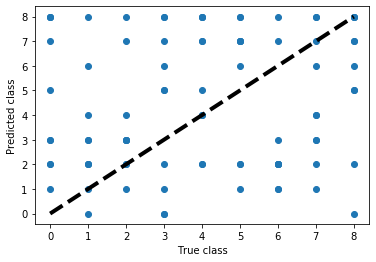

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_true, y_pred)
ax.plot([y_true.min(), y_true.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('True class')
ax.set_ylabel('Predicted class')
plt.show()

In [634]:
filenames=test_generator_.filenames
y_pred.T
#results=pd.DataFrame({"Filename":filenames,
   #                   "Predictions":predictions})
y_pred.T.tolist()
y_pred

array([[1.],
       [7.],
       [8.],
       [6.],
       [3.],
       [3.],
       [7.],
       [6.],
       [6.],
       [1.],
       [6.],
       [7.],
       [5.],
       [8.],
       [7.],
       [7.],
       [4.],
       [0.],
       [7.],
       [1.],
       [2.],
       [2.],
       [0.],
       [3.],
       [1.],
       [3.],
       [7.],
       [6.],
       [7.],
       [1.],
       [8.],
       [4.],
       [4.],
       [1.],
       [3.],
       [0.],
       [5.],
       [1.],
       [0.],
       [5.],
       [2.],
       [6.],
       [6.],
       [2.],
       [0.],
       [6.],
       [5.],
       [4.],
       [5.],
       [1.],
       [0.],
       [2.],
       [4.],
       [4.],
       [6.],
       [0.],
       [1.],
       [4.],
       [6.],
       [1.],
       [0.],
       [0.],
       [5.],
       [2.],
       [1.],
       [2.],
       [5.],
       [1.],
       [2.],
       [5.],
       [2.],
       [1.],
       [6.],
       [5.],
       [5.],
       [1.],
       [6.],

In [540]:
from keras.models import load_model
from keras.preprocessing import image

# testing = load_model()

# cnn.compile(optimizer=keras.optimizers.Adagrad(lr=0.01),
#                   loss=['mse'],
#                   metrics=['accuracy','mae'])

test_image = image.load_img('/Users/fatimaloumaini/Documents/PassionProject/Test/3c/6.jpg', target_size = (150, 150)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = cnn.predict(test_image)

In [541]:
result

array([[7.5199714]], dtype=float32)

In [523]:
y_true- y_pred.T

array([[-5., -4., -8., -4., -7.,  0., -7., -1., -4., -1.,  1., -6., -6.,
        -4.,  0., -4., -1.,  1.,  1.,  0., -4.,  0.,  0.,  0., -5., -5.,
         2.,  1.,  2., -5.,  0., -2., -5.,  0.,  3.,  2., -4., -4.,  1.,
        -3.,  2.,  1., -4.,  2.,  2.,  2.,  0., -3., -2., -3.,  3.,  3.,
        -2.,  3., -4.,  0., -1., -2.,  0.,  1.,  4.,  5.,  5., -1., -3.,
         3., -3.,  5.,  3., -1.,  0.,  4., -2., -2., -2.,  4.,  4., -1.,
        -1.,  3.,  0., -1.,  6., -1.,  4.,  7.,  6.,  2.,  5.,  4.,  7.,
         6.,  6.,  3.,  6.,  4.,  8.,  7.,  7.,  7.,  3.,  8.,  4.]])

In [528]:
label_map = (test_generator_.class_indices)

In [530]:
label_map

{'2a': 0,
 '2b': 1,
 '2c': 2,
 '3a': 3,
 '3b': 4,
 '3c': 5,
 '4a': 6,
 '4b': 7,
 '4c': 8}

In [519]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))



[[1 2 0 0 3 1 0 2 1]
 [3 3 1 0 0 3 0 2 0]
 [2 1 3 0 1 0 0 3 0]
 [1 4 2 1 0 0 1 3 1]
 [1 3 1 1 3 1 3 2 1]
 [3 1 2 0 0 1 2 1 2]
 [1 0 2 1 0 0 1 4 2]
 [2 3 1 2 0 1 0 0 0]
 [2 3 1 0 2 2 0 0 0]]


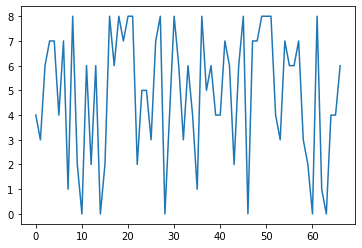

In [471]:
plt.plot(np.ravel(predicted_class_indices))



In [359]:
[labels[predicted_class_indices[j][0]] for j in range(20)]

['4b',
 '4c',
 '3a',
 '4b',
 '4a',
 '4a',
 '3b',
 '2a',
 '4b',
 '4b',
 '4b',
 '4a',
 '2a',
 '4a',
 '4a',
 '3b',
 '3b',
 '3b',
 '3a',
 '3a']

In [473]:
# name of the classes
labels = (test_generator_.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]



TypeError: unhashable type: 'numpy.ndarray'

In [564]:
list(map(lambda i: labels[i[0]], predicted_class_indices))




KeyError: 2.0

In [337]:
labels

{0: '2a',
 1: '2b',
 2: '2c',
 3: '3a',
 4: '3b',
 5: '3c',
 6: '4a',
 7: '4b',
 8: '4c'}

In [272]:
import pandas as pd

In [273]:
filenames=test_generator_.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})



ValueError: arrays must all be same length